In [2]:
import pandas as pd

In [3]:
admission = pd.read_csv('admissionData.csv')

In [4]:
admission.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


In [5]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          400 non-null    float64
 1   GRE Score          400 non-null    float64
 2   TOEFL Score        400 non-null    float64
 3   University Rating  400 non-null    float64
 4    SOP               400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    float64
 8   Chance of Admit    400 non-null    float64
dtypes: float64(9)
memory usage: 28.4 KB


In [6]:
admission.describe()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
admission.columns

Index(['Serial No', 'GRE Score', 'TOEFL Score', 'University Rating', ' SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
y = admission['Chance of Admit ']

In [9]:
X = admission.drop(['Serial No','Chance of Admit '],axis=1)
print(X)

     GRE Score  TOEFL Score  University Rating   SOP  LOR   CGPA  Research
0        337.0        118.0                4.0   4.5   4.5  9.65       1.0
1        324.0        107.0                4.0   4.0   4.5  8.87       1.0
2        316.0        104.0                3.0   3.0   3.5  8.00       1.0
3        322.0        110.0                3.0   3.5   2.5  8.67       1.0
4        314.0        103.0                2.0   2.0   3.0  8.21       0.0
..         ...          ...                ...   ...   ...   ...       ...
397      330.0        116.0                4.0   5.0   4.5  9.45       1.0
398      312.0        103.0                3.0   3.5   4.0  8.78       0.0
399      333.0        117.0                4.0   5.0   4.0  9.66       1.0
400        NaN          NaN                NaN   NaN   NaN   NaN       NaN
401        NaN          NaN                NaN   NaN   NaN   NaN       NaN

[402 rows x 7 columns]


In [21]:
from sklearn.model_selection import train_test_split
import numpy as np
mask = ~np.isnan(X).any(axis=1)
X = X[mask]
y = y[mask]


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 7), (120, 7), (280,), (120,))

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [26]:
model.fit(X_train, y_train)

LinearRegression()

In [27]:
model.coef_

array([ 0.00204057,  0.00287273,  0.00566887, -0.00380559,  0.01973175,
        0.11314449,  0.02061553])

In [28]:
y_pred = model.predict(X_test)

In [29]:
y_pred

array([0.71426327, 0.72534136, 0.69677103, 0.66566584, 0.57483872,
       0.93087527, 0.93701113, 0.72361387, 0.81130158, 0.62223963,
       0.59629648, 0.80084072, 0.52537944, 0.79174558, 0.84064992,
       0.66429594, 0.65136589, 0.66990687, 0.75794085, 0.86072023,
       0.66088101, 0.85570763, 0.84777425, 0.95033179, 0.68750762,
       0.65907671, 0.65279623, 0.5709259 , 0.55895645, 0.57990205,
       0.54497918, 0.7570717 , 0.69682571, 0.77286067, 0.64320811,
       0.5183554 , 0.43816818, 0.84654064, 0.90398354, 0.80517781,
       0.72218971, 0.72882587, 0.68145136, 0.88592237, 0.77208852,
       0.78778085, 0.95526121, 0.88586486, 0.59980416, 0.50690214,
       0.59947098, 0.63380406, 0.82841217, 0.44911724, 0.71068577,
       0.77335748, 0.68851557, 0.64486026, 0.85537724, 0.65517768,
       0.65046031, 0.90818978, 0.63422429, 0.68658606, 0.72150268,
       0.69030545, 0.59381287, 0.93813035, 0.58997351, 0.91542587,
       0.59283415, 0.93351713, 0.59478751, 0.71380389, 0.54346

In [30]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [31]:
mean_absolute_error(y_test,y_pred)

0.04400128934232651

In [32]:
mean_absolute_percentage_error(y_test,y_pred)

0.07575278864605438

In [34]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

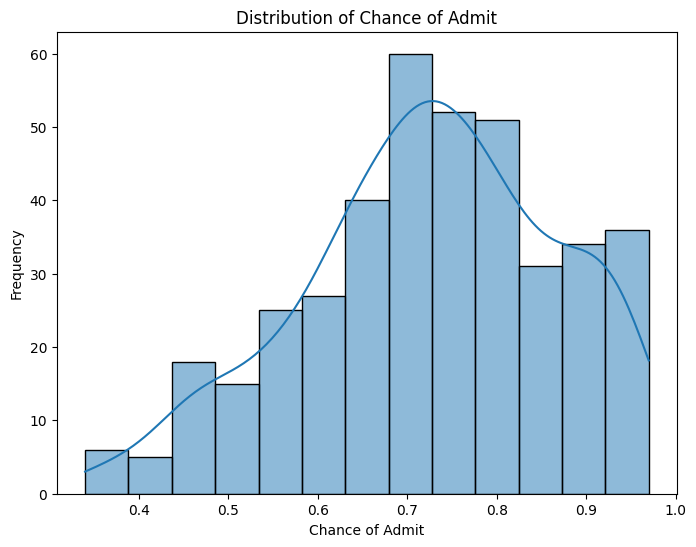

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True)
plt.title('Distribution of Chance of Admit')
plt.xlabel('Chance of Admit')
plt.ylabel('Frequency')
plt.show()


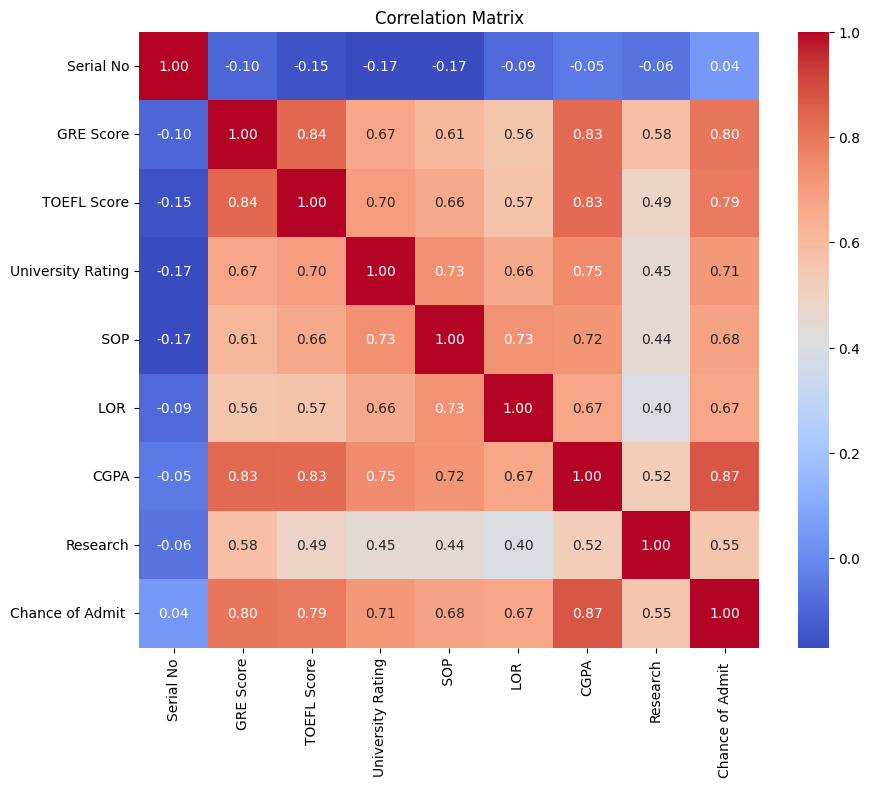

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(admission.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


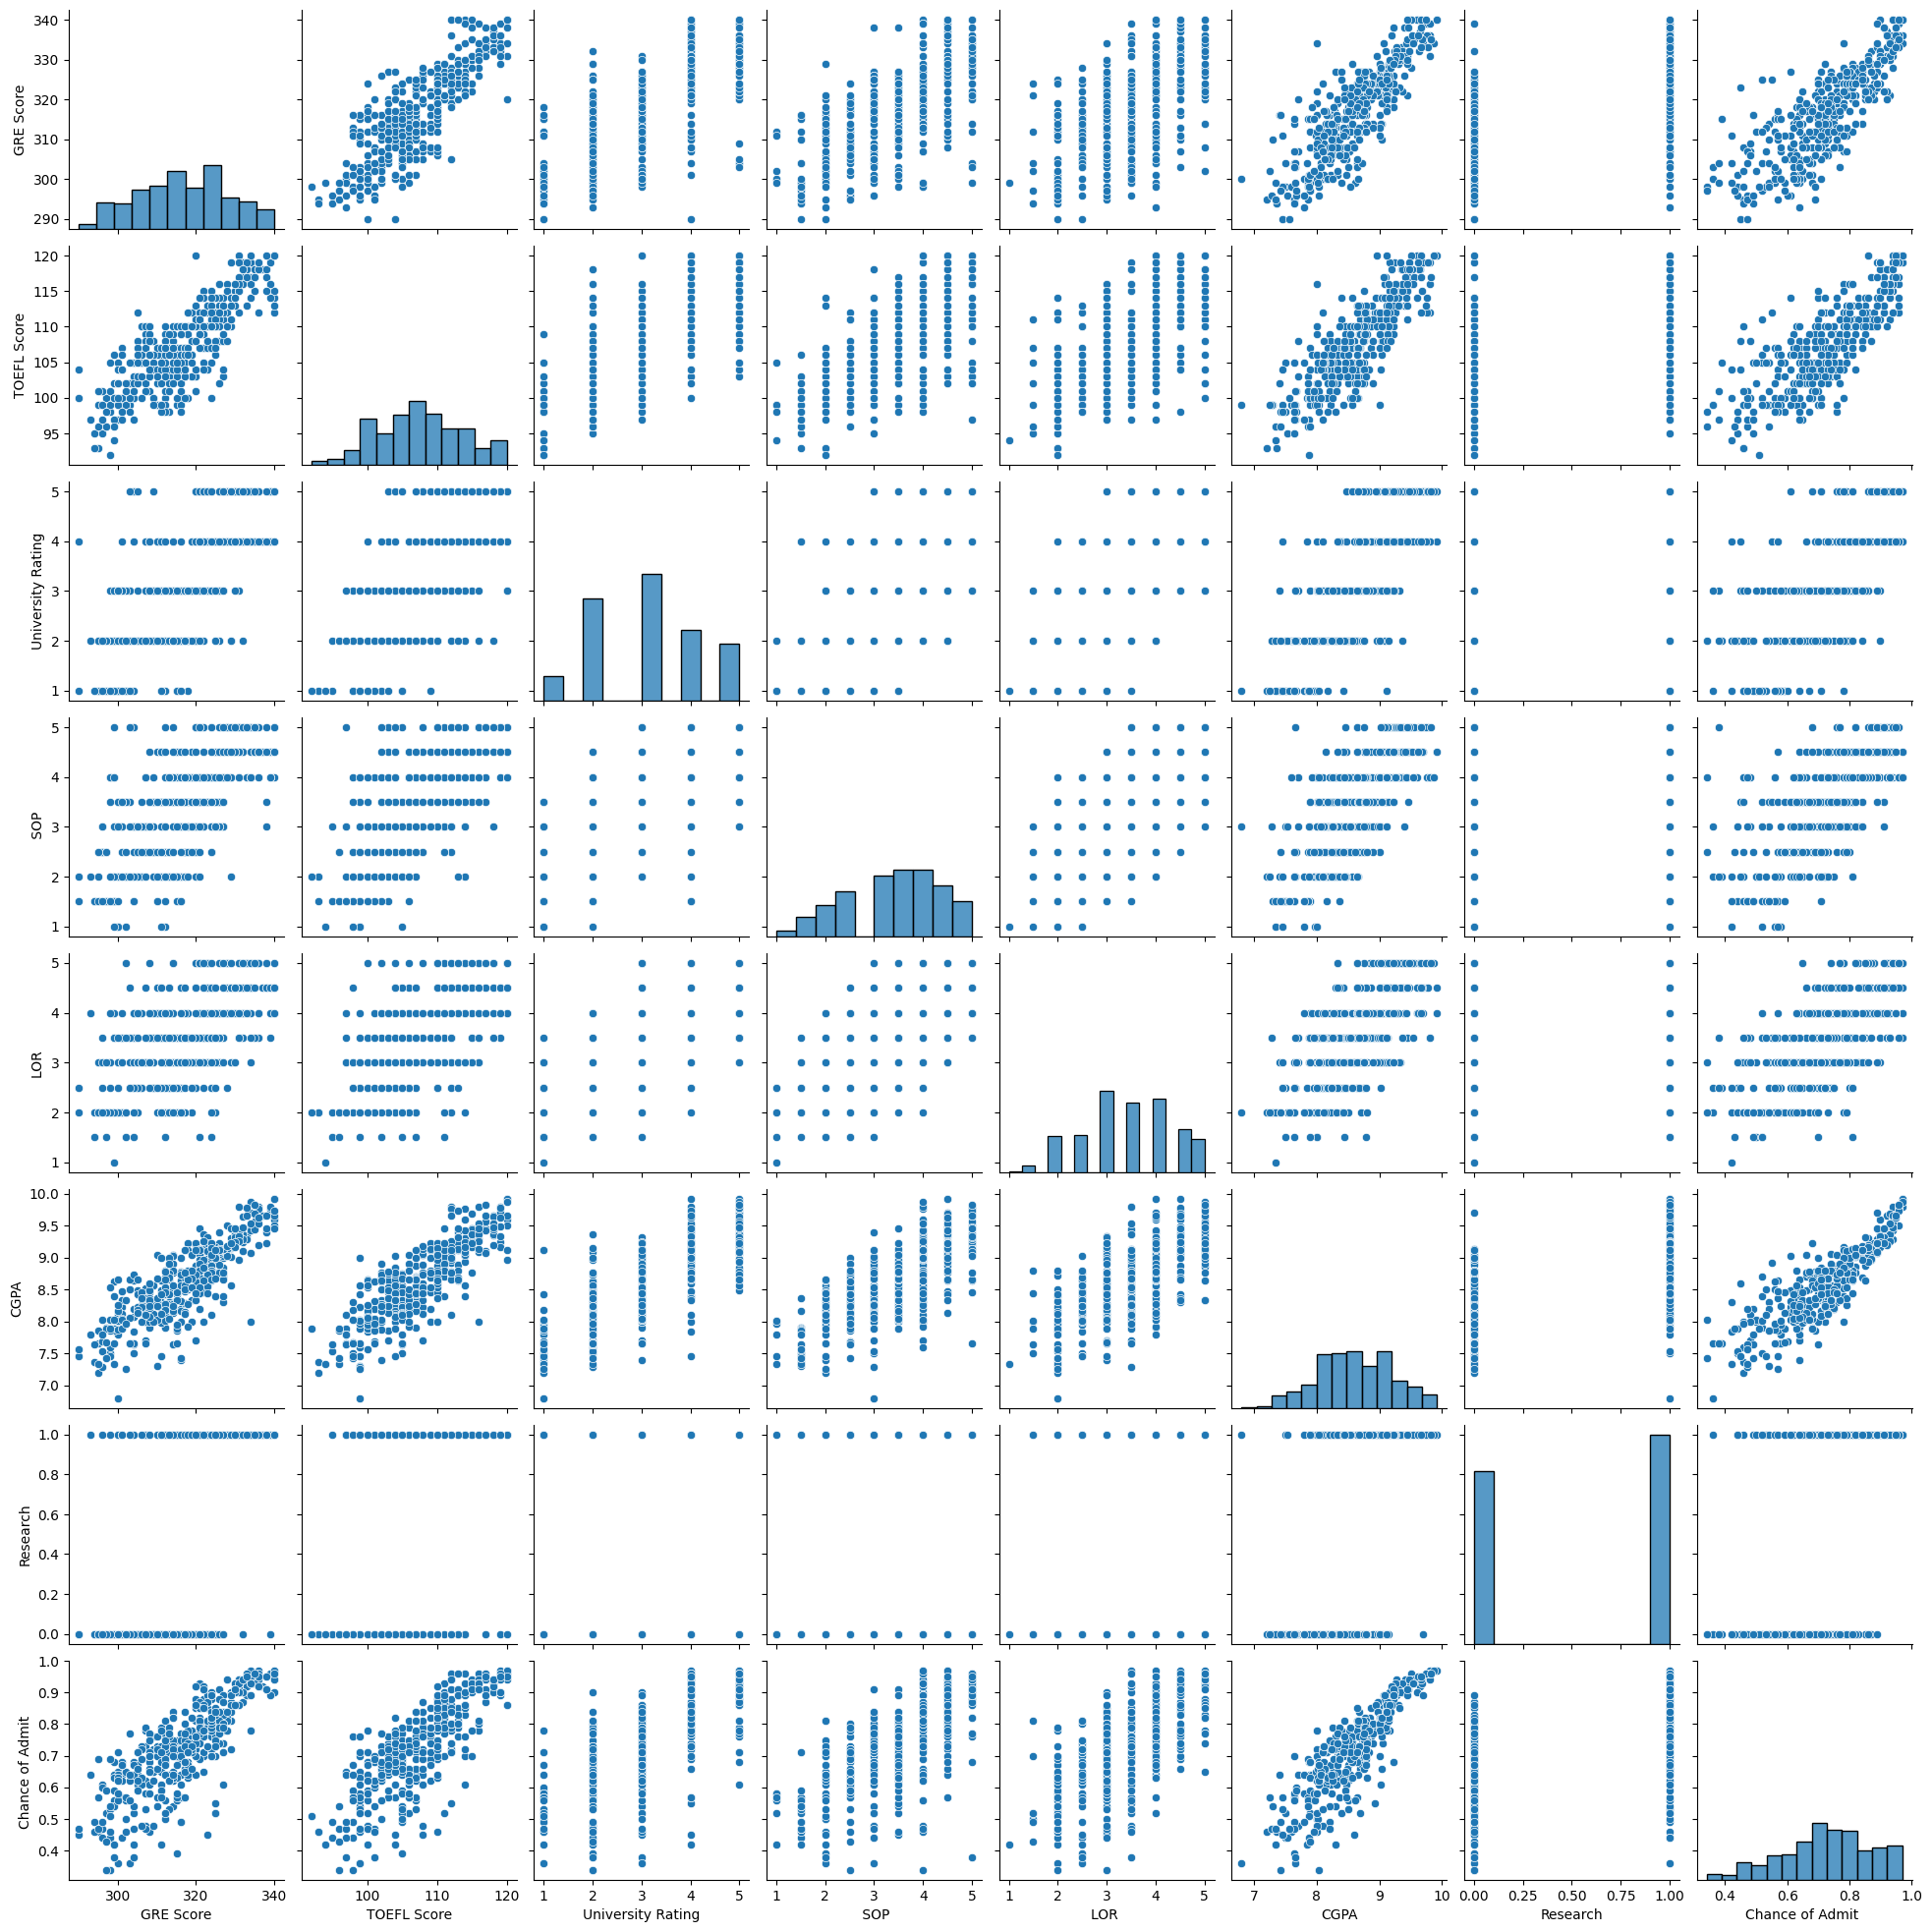

In [37]:
sns.pairplot(admission.drop('Serial No', axis=1))
plt.show()

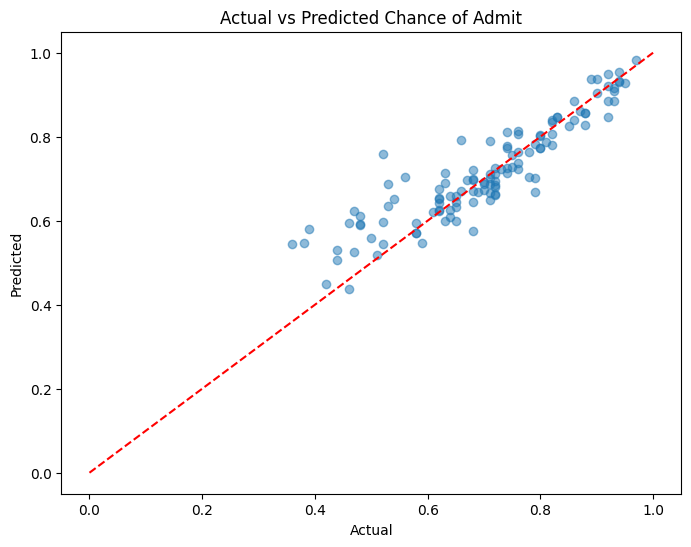

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Chance of Admit')
plt.show()


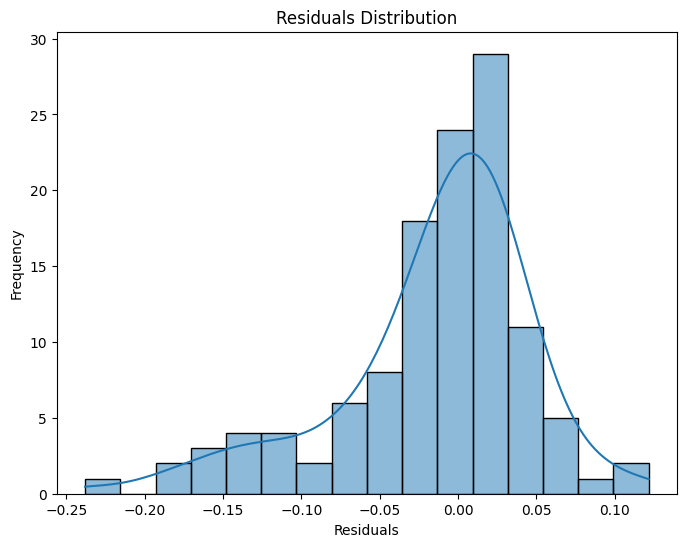

In [41]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
